## Decision tree for classification

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

tree = DecisionTreeClassifier().fit(X_train, y_train)
print("Train score {}".format(tree.score(X_train, y_train)))
print("Test score {}".format(tree.score(X_test, y_test)))

Train score 1.0
Test score 0.9440559440559441


In [4]:
tree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
print("Train score {}".format(tree.score(X_train, y_train)))
print("Test score {}".format(tree.score(X_test, y_test)))

Train score 0.9953051643192489
Test score 0.9440559440559441


In [5]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

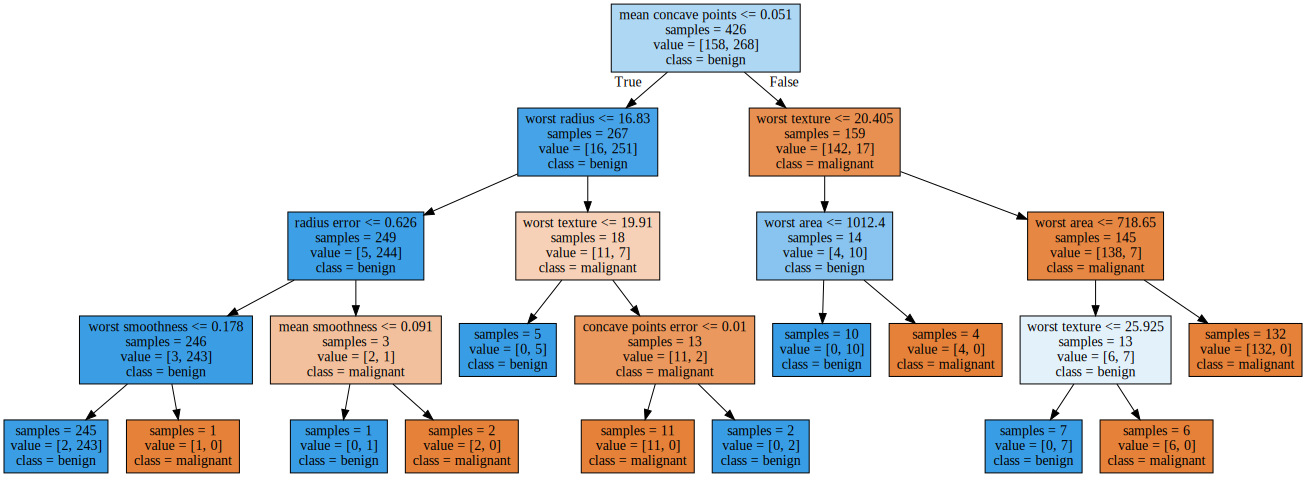

In [6]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Feature importance [0.         0.         0.         0.         0.00684355 0.
 0.         0.71010827 0.         0.         0.013032   0.
 0.         0.         0.         0.         0.         0.01737208
 0.         0.         0.06019401 0.11783988 0.         0.06455287
 0.01005736 0.         0.         0.         0.         0.        ]


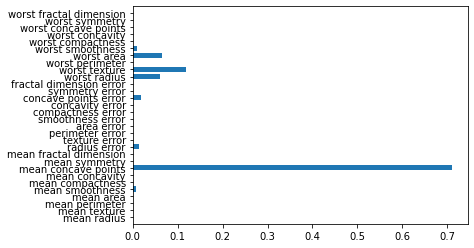

In [7]:
# check the most important feautures
print("Feature importance {}".format(tree.feature_importances_))

import matplotlib.pyplot as plt
import numpy as np

def important_features_plot(tree):
    features = cancer.data.shape[1]
    plt.barh(range(features), tree.feature_importances_, align='center')
    plt.yticks(np.arange(features), cancer.feature_names)
    plt.ylim(-1, features)

important_features_plot(tree)

## Ensebles of Decision Trees

## Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(X_train, y_train)

print("Train {}".format(forest.score(X_train, y_train)))
print("Test {}".format(forest.score(X_test, y_test)))

Train 0.9866666666666667
Test 0.88


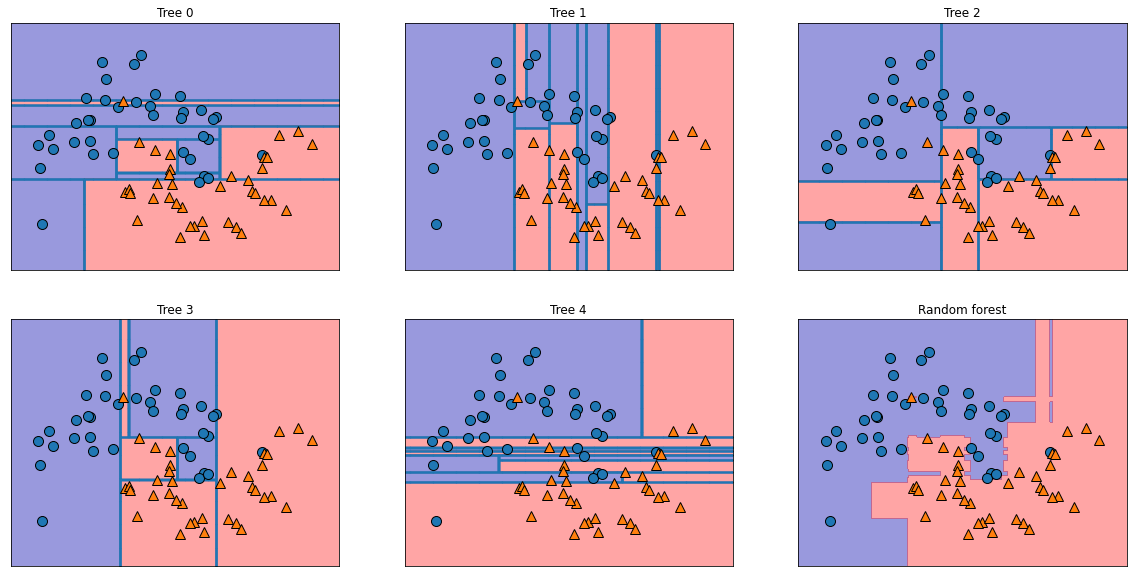

In [9]:
## random forest visualizations
import mglearn

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("Random forest")
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

Train score 1.0
Test score 0.972027972027972


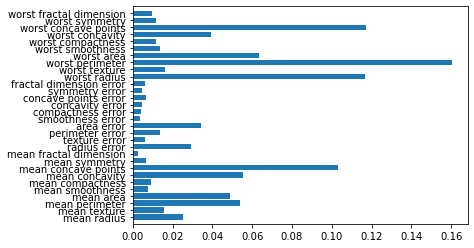

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest100 = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
print("Train score {}".format(forest100.score(X_train, y_train)))
print("Test score {}".format(forest100.score(X_test, y_test)))

important_features_plot(forest100)

## Gradient boosted regression trees

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

# default tree is using 
# 100 trees
# 3 dept maximum
# 0.1 learning rate
gboost = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("Train score {}".format(gboost.score(X_train, y_train)))
print("Test score {}".format(gboost.score(X_test, y_test)))

Train score 1.0
Test score 0.965034965034965


In [20]:
gboostDepth1 = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print("Train score {}".format(gboostDepth1.score(X_train, y_train)))
print("Test score {}".format(gboostDepth1.score(X_test, y_test)))

Train score 0.9906103286384976
Test score 0.972027972027972


In [23]:
gboostLr = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)

print("Train score {}".format(gboostLr.score(X_train, y_train)))
print("Test score {}".format(gboostLr.score(X_test, y_test)))

Train score 0.9882629107981221
Test score 0.965034965034965


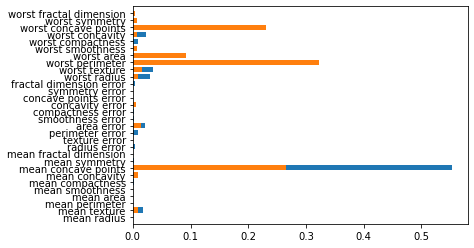

In [25]:
# visualizing the important features
# of default tree
important_features_plot(gboost)

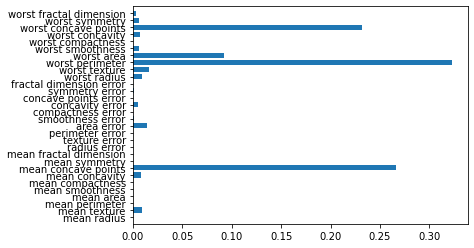

In [27]:

important_features_plot(gboostDepth1)

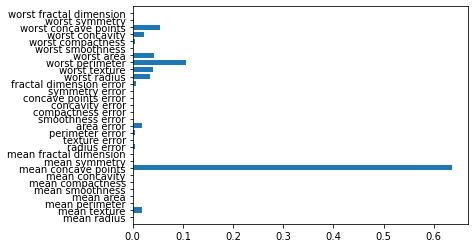

In [26]:
important_features_plot(gboostLr)